# **EDA**

El primer paso consiste en estudiar los tres dataframes que tenemos.

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import sys
sys.path.append("../")

from src import funciones_eda as fe

pd.set_option("display.max_columns", None)

In [2]:
df_employee_survey_data = pd.read_csv("../datos/employee_survey_data.csv")
df_employee_survey_data.head(2)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


In [3]:
df_general_data = pd.read_csv("../datos/general_data.csv")
df_general_data.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4


In [4]:
df_manager_survey_data = pd.read_csv("../datos/manager_survey_data.csv")
df_manager_survey_data.head(2)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


Todos ellos tienen 4410 filas con IDs únicos en cada una de ellas correspondientes a distintos trabajdores por lo que podemos hacer un merge de las tres tablas por esta columna y unir todos los datos en una sola tabla.

In [5]:
df_temp = df_employee_survey_data.merge(df_general_data)
df = df_temp.merge(df_manager_survey_data)
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


Comenzamos con el EDA de la tabla completa:

In [6]:
fe.exploracion_dataframe(df)

El número de datos es 4410 y el de columnas es 29

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
EnvironmentSatisfaction,0.566893
JobSatisfaction,0.453515
WorkLifeBalance,0.861678
NumCompaniesWorked,0.430839
TotalWorkingYears,0.204082



 ..................... 

Los tipos de las columnas son:


,tipo_dato
EmployeeID,int64
EnvironmentSatisfaction,float64
JobSatisfaction,float64
WorkLifeBalance,float64
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,int64



 ..................... 



,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ATTRITION tiene las siguientes valore únicos:


,count
Attrition,
No,3699
Yes,711


La columna BUSINESSTRAVEL tiene las siguientes valore únicos:


,count
BusinessTravel,
Travel_Rarely,3129
Travel_Frequently,831
Non-Travel,450


La columna DEPARTMENT tiene las siguientes valore únicos:


,count
Department,
Research & Development,2883
Sales,1338
Human Resources,189


La columna EDUCATIONFIELD tiene las siguientes valore únicos:


,count
EducationField,
Life Sciences,1818
Medical,1392
Marketing,477
Technical Degree,396
Other,246


La columna GENDER tiene las siguientes valore únicos:


,count
Gender,
Male,2646
Female,1764


La columna JOBROLE tiene las siguientes valore únicos:


,count
JobRole,
Sales Executive,978
Research Scientist,876
Laboratory Technician,777
Manufacturing Director,435
Healthcare Representative,393


La columna MARITALSTATUS tiene las siguientes valore únicos:


,count
MaritalStatus,
Married,2019
Single,1410
Divorced,981


La columna OVER18 tiene las siguientes valore únicos:


,count
Over18,
Y,4410


- Tenemos un dataframe de 4410 filas con 29 columnas.
- No hay duplicados.
- En cuanto a nulos hay bastante pocos y habrá que ver como gestionarlos.
- Las columnas de EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, JobInvolvement, BusinessTravel, PerformanceRating, Education, JobLevel, StockOptionLevel, TrainingTimesLastYear son variables que a pesar de ser numéricas actúan como categóricas, por lo que las transformamos a categóricas.
- EmployeeCount, Over18, StandardHours tienen todos el mismo valor por lo que borramos las columnas.
- EmployeeID hay un id diferente por fila por lo que lo eliminamos.

- En nuestra VR tenemos un gran desbalnaceo por lo que vamos a tener que gestionarlo.




In [7]:
df.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeID"], inplace=True)

columns_to_convert = [
    "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance",
    "Education", "JobLevel", "StockOptionLevel",
    "JobInvolvement", "PerformanceRating", "TrainingTimesLastYear"
]

df[columns_to_convert] = df[columns_to_convert].astype("object")

A la hora de hacer el encoding la primera opción para esta columnas es devolverlas a su valor numérico.

### 1. Visualizar numéricas y categóricas.

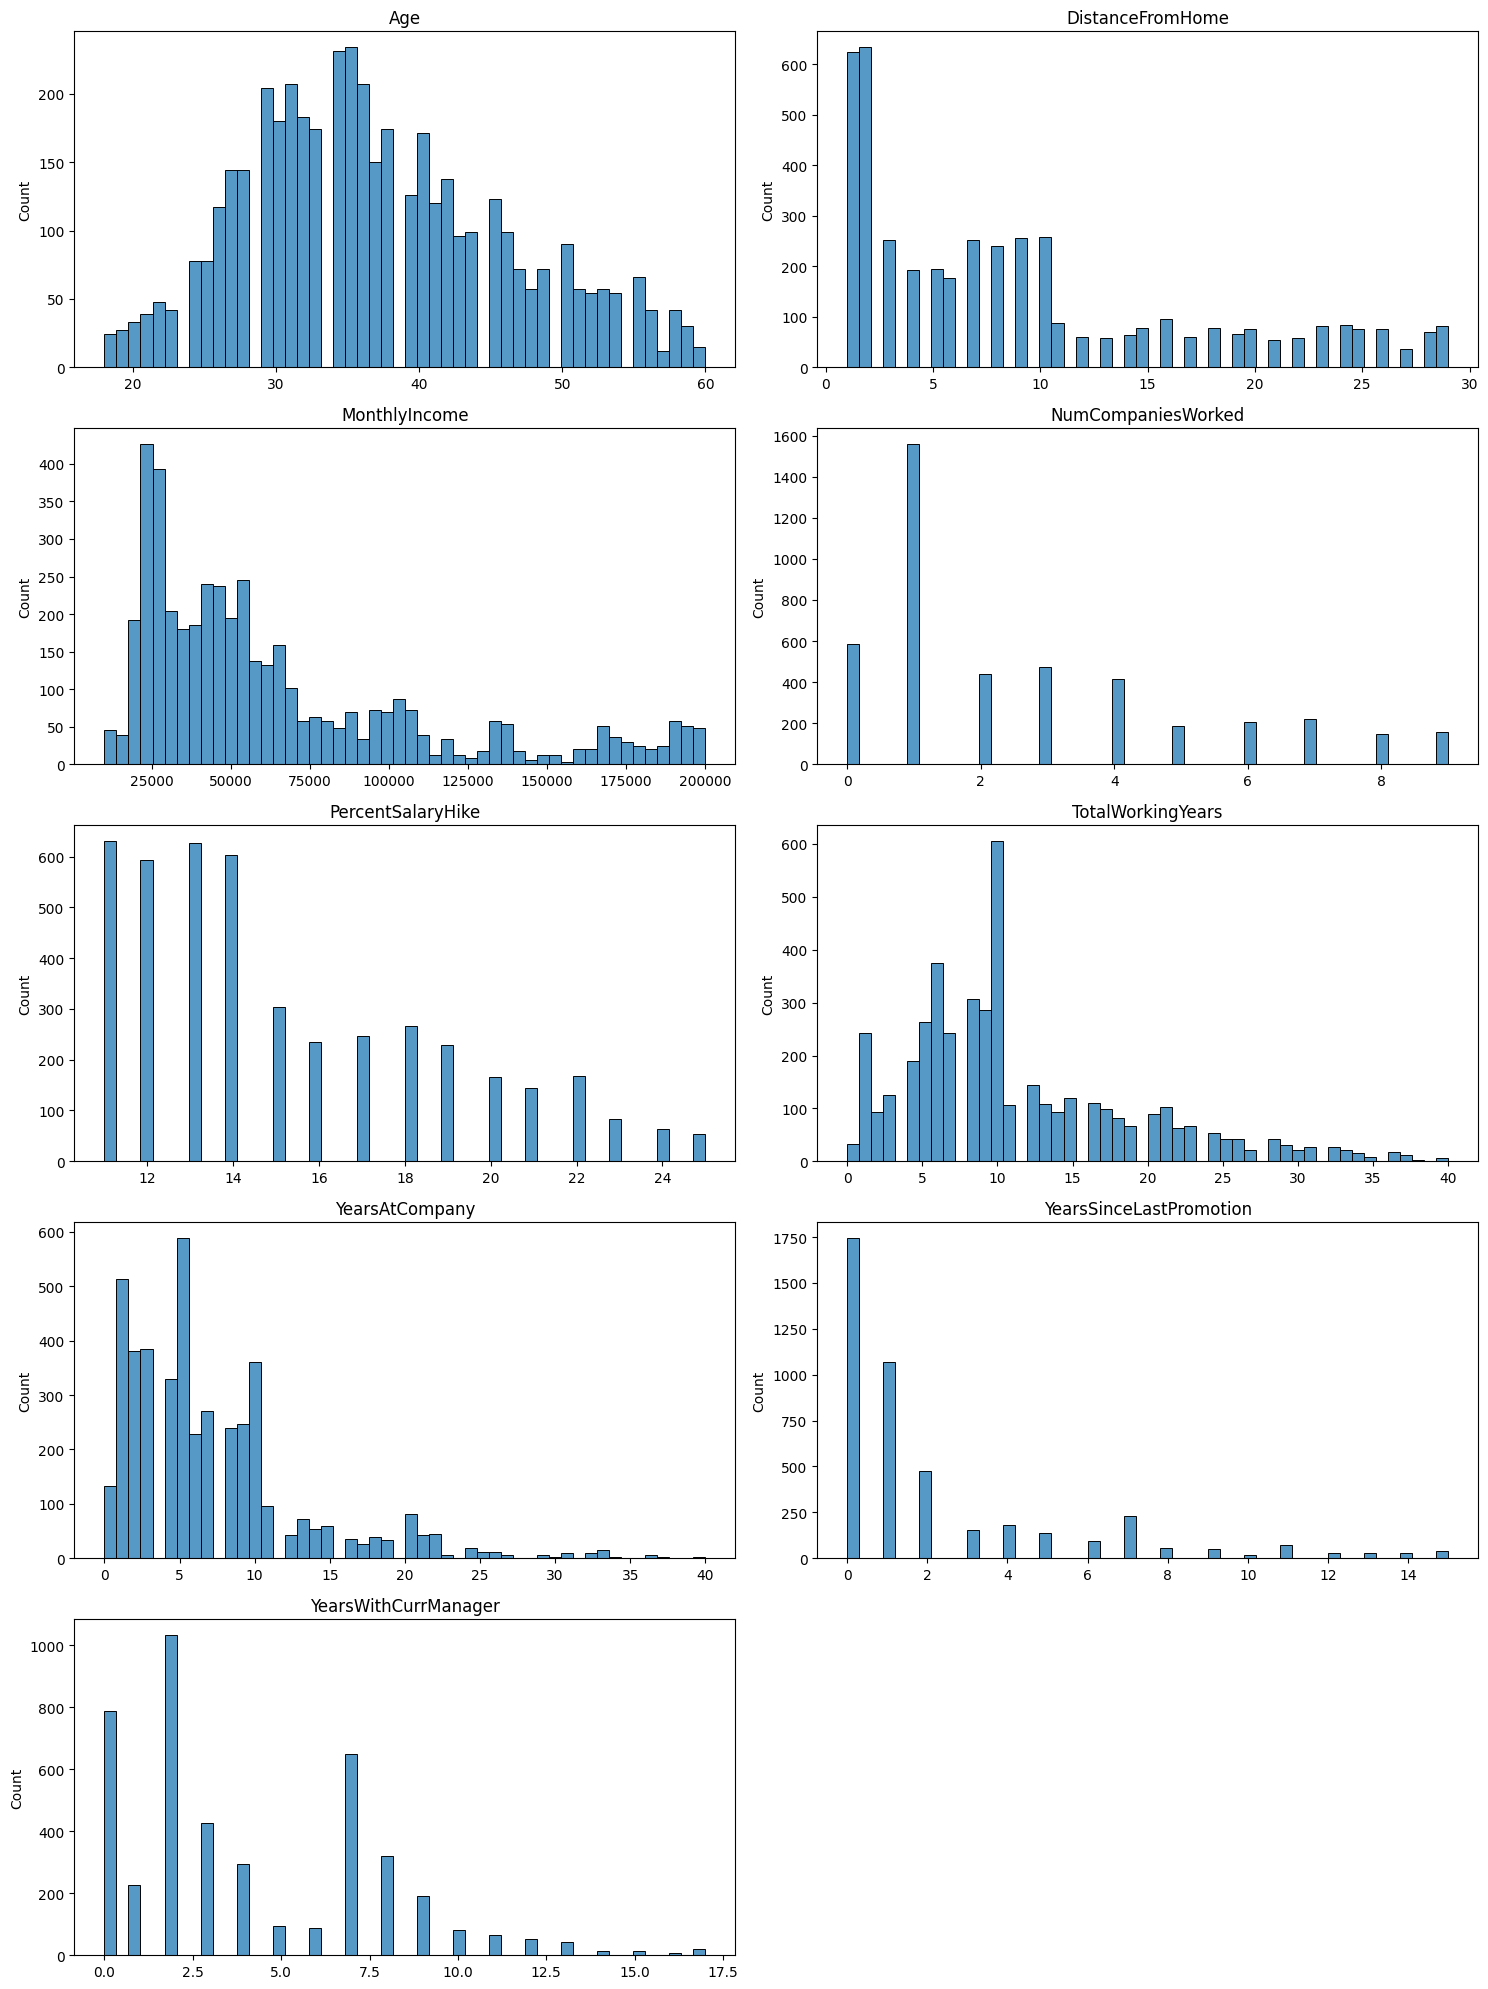

In [8]:
df_num, df_cat = fe.separar_df(df)
fe.plot_numericas(df_num, figsize=(15, 20))

Aunque parezca que variables como NumComapniesWorked, PercentSalaryHike, YearsSinceLastPromotion o YearsWithCurrManager se comportan como categóricas, no podemos pasarlas a categóricas ya que como tienen tantos valores si hubiera que hacer un one hot encoding generaríamos tantas columnas que computacionalmente no merece la pena.

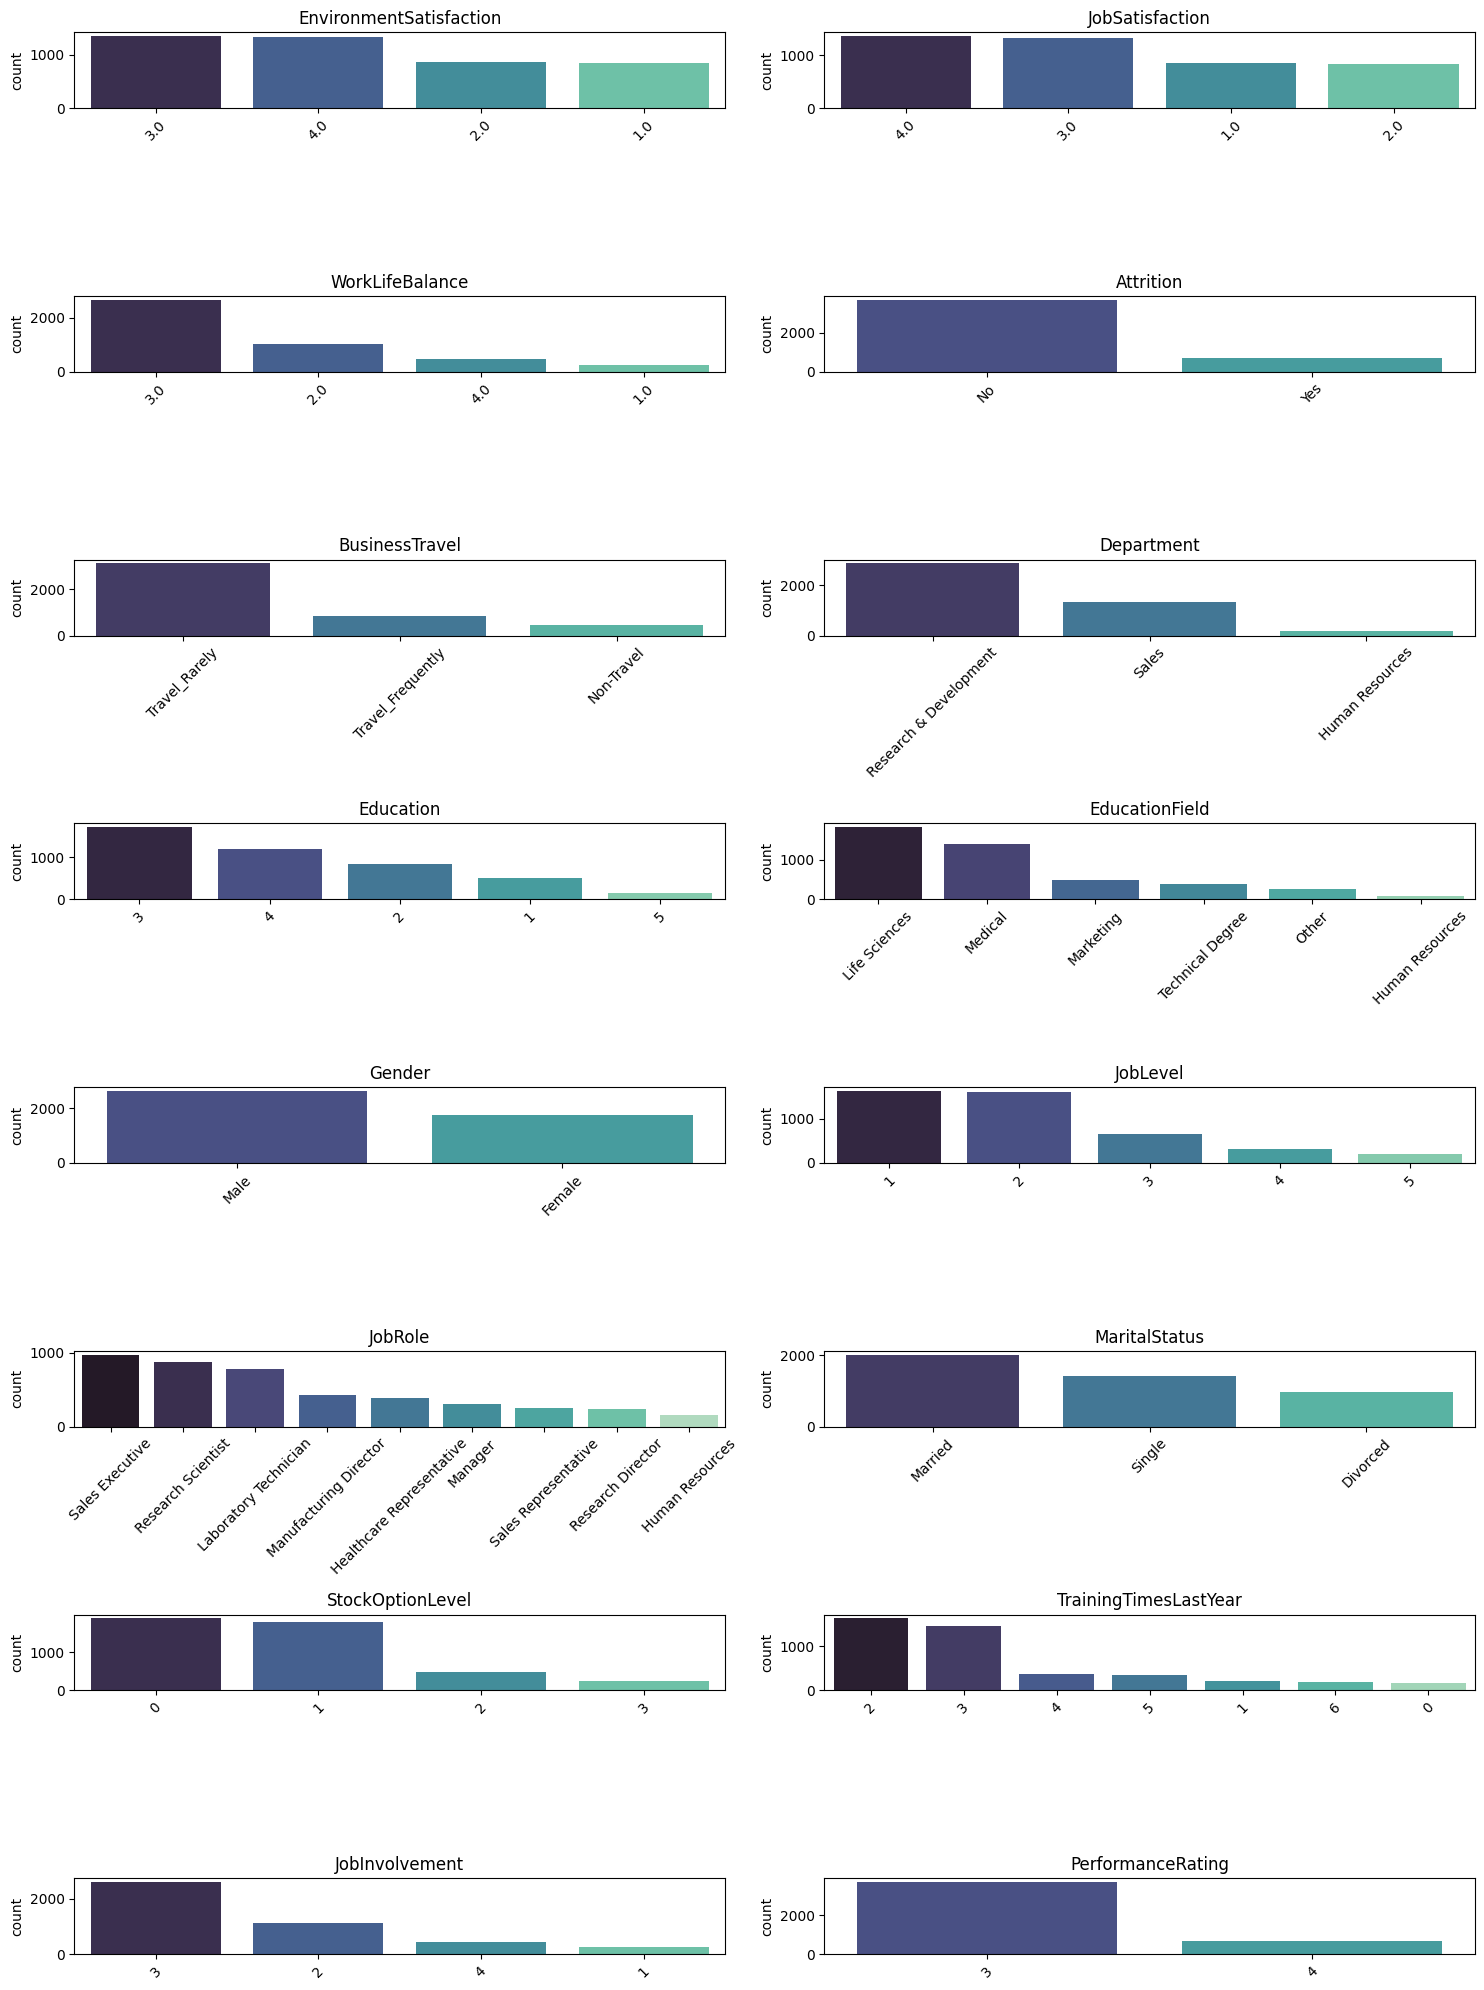

In [9]:
fe.plot_categoricas(df_cat)

Las proporciones para cada columna son bastantevariadas, entre las columnas numéricas todas parecen tener sentido y no tenemos ninguna razon sólida como para eliminar ninguna columna. 

Notar que en nuestro conjunto tenemos más hombres que mujeres, el job level es sobre todo 1 y 2, la mayoría son casado con un Job involmente, Performance rating, Education y worklife balance de 3 principalmente. 

### 2. Visualizar la relación de las numéricas y categóricas con la variable respuesta.

In [10]:
df_vr_num = df.copy()
df_vr_num["Attrition"] = df_vr_num["Attrition"].map({"No":0, "Yes":1})

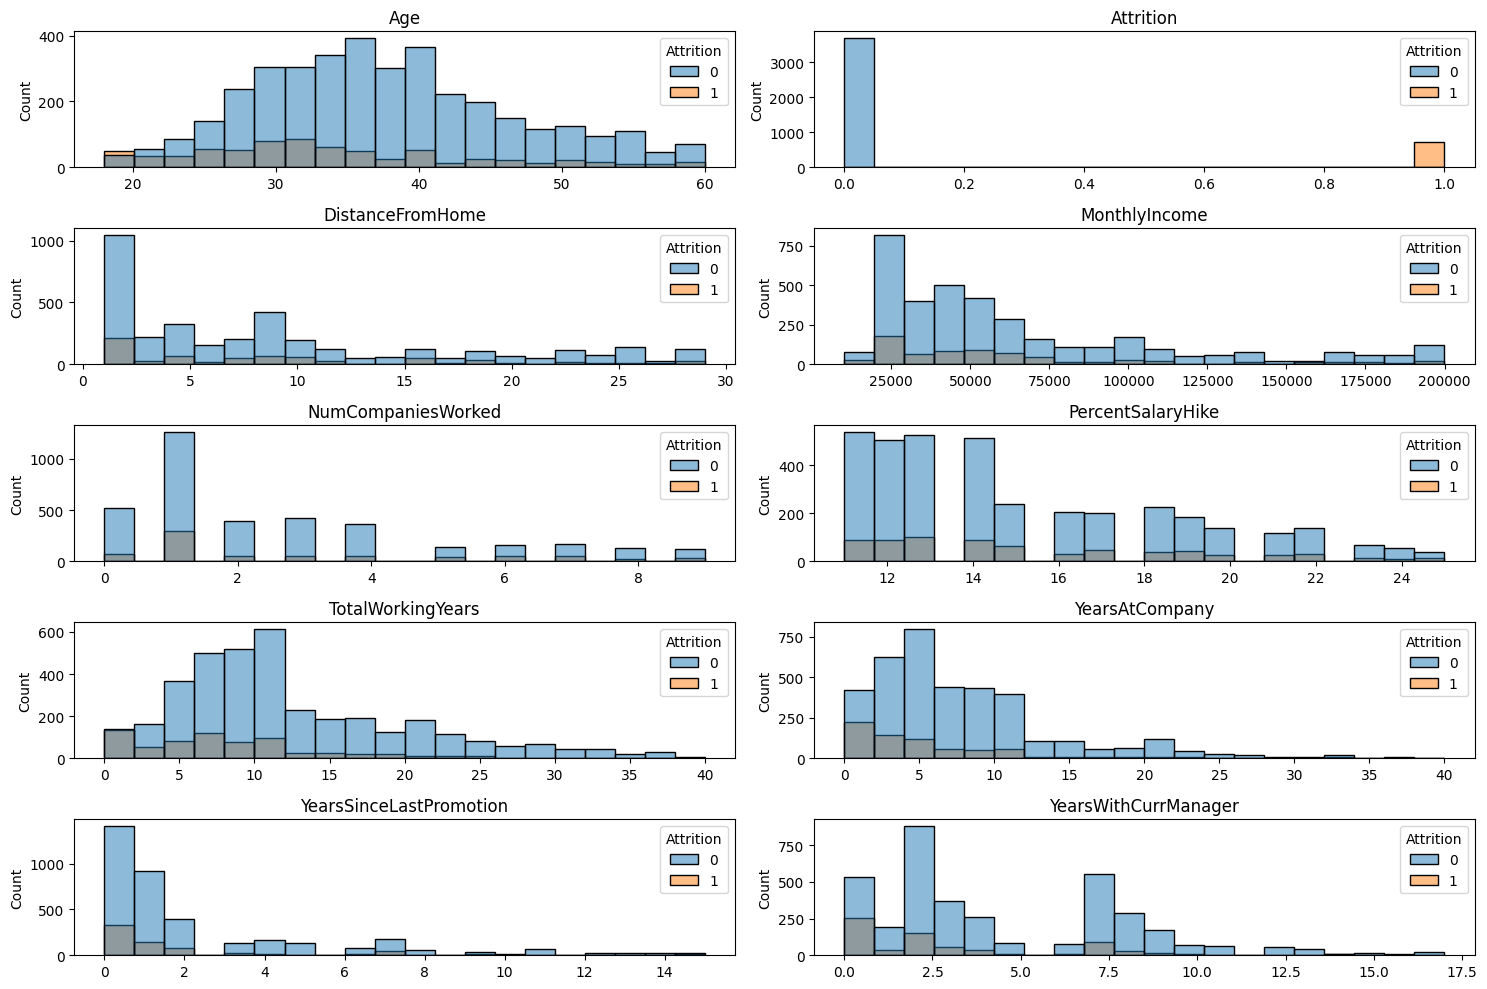

In [83]:
fe.relacion_vr_numericas_problema_categorico(df_vr_num, "Attrition")

Se ven siempre el azul por encima ya que es lógico que esto ocurra pues hemos visto que hay un gran desbalanceo en los datos. Aún así se puede observar hasta donde llega la columna naranja en el gráfico, podemos ver que para Age la Attrition es mayor en torno a los 30. También es sorprendente el valor tan añto que se obtiene en TotalWorkingYears para 0-1 pues casi el 50% se van de la empresa. Parecido ocurre con YearsAtCompany, a los 0-1 años se va más gente. En cuanto al resto de columnas es complicado extraer conclusiones pues las columnas donde se van más empleados son generalmente en las cuales hay más valores por lo que percentualemnte no es tanto. 


Por lo que a grandes rasgos hemos visto que las personas de unos 30 años con más o menos un año de experiencia y entorno un año en la empresa son los más propensos a dejar su trabajo e irse.

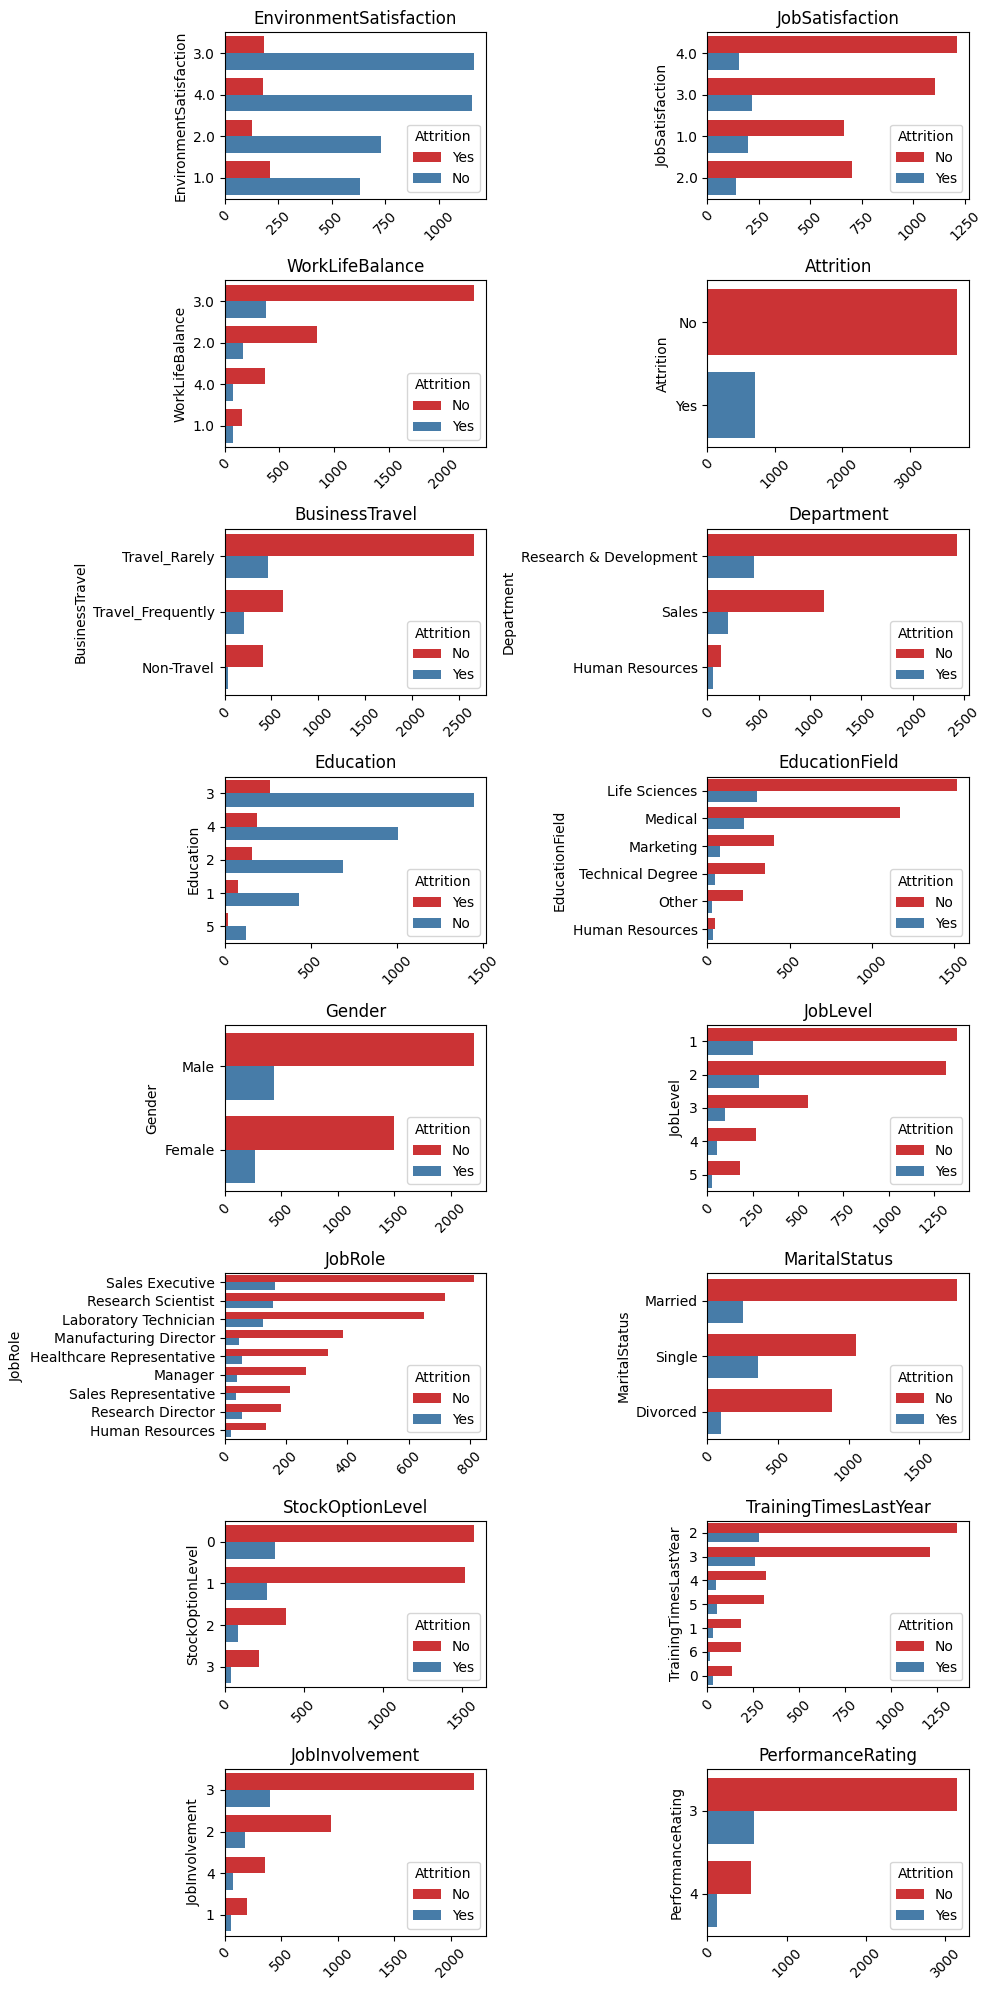

In [84]:
#df_num, df_cat = fe.separar_df(df_vr_num)
fe.relacion_vr_categoricas_problema_categorico(df_cat, "Attrition", figsize=(10,20))

### 3. Correlación entre variables numéricas

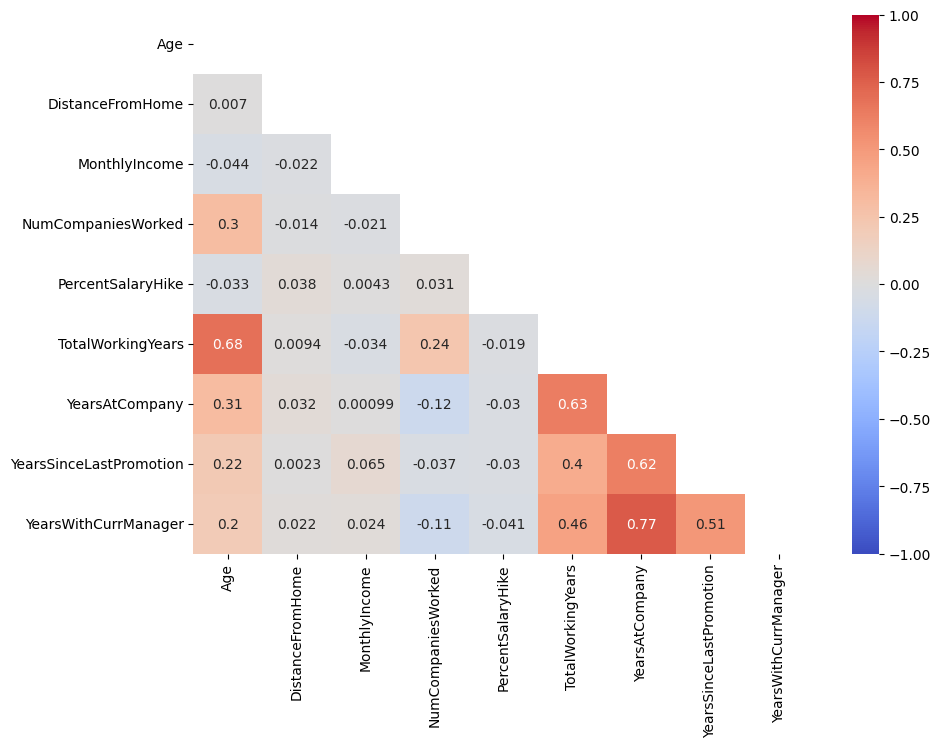

In [85]:
fe.heatmap_correlacion(df)

Las correlaciones que observamos son bastante lógicas por lo que no vemos ninguna que nos sorprenda.

### 4. Outliers

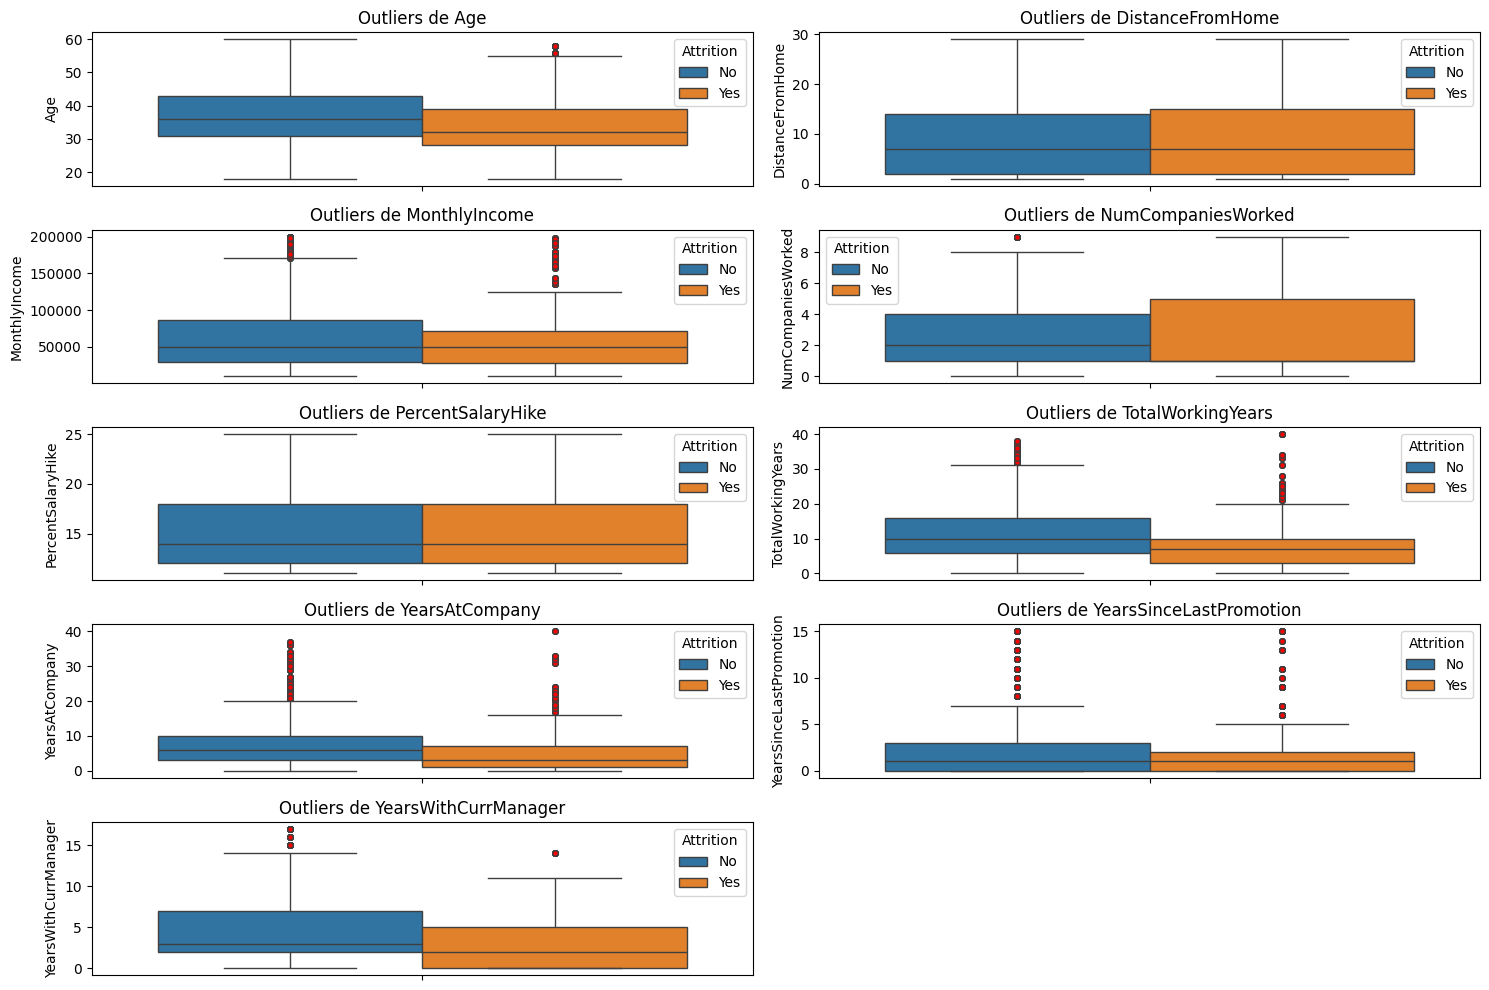

In [86]:
fe.detectar_outliers_problema_clasificacion(df,"Attrition", figsize=(15,10), rotate=False)

Como podemos observar hay outliers en alguna variable, lo cuale está bien que sepamos pero los cuales gestionaremos en el paso de los outliers.

# **Gestión de nulos**

Como vimos anteriormente no hay muchos nulos:

In [99]:
porc_nulos = round(100-(df.dropna(how='any').shape[0]/df.shape[0]*100), 2)
print(f"El porcentaje de nulos en el dataframe es de {porc_nulos}%")

El porcentaje de nulos en el dataframe es de 2.49%


Como primera aproximación los eliminamos:

In [101]:
df_nonulls = df.dropna(how='any')
df_nonulls

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,Single,35390,1.0,18,0,6.0,2,6,1,5,2,3
4405,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,3,3
4406,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,2,3
4407,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,3,4


In [102]:
df_nonulls.to_pickle("../datos/dataframes/df_nonulls.pkl")